<a href="https://colab.research.google.com/github/Amy-codes-stuff/Netflix-EDA-project/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Load dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Basic overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5398 entries, 0 to 5397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       5398 non-null   object 
 1   type          5398 non-null   object 
 2   title         5397 non-null   object 
 3   director      3515 non-null   object 
 4   cast          4903 non-null   object 
 5   country       4735 non-null   object 
 6   date_added    5397 non-null   object 
 7   release_year  5397 non-null   float64
 8   rating        5397 non-null   object 
 9   duration      5397 non-null   object 
 10  listed_in     5397 non-null   object 
 11  description   5397 non-null   object 
dtypes: float64(1), object(11)
memory usage: 506.2+ KB


In [4]:
df.describe()

,release_year
count,5397.000000
mean,2016.083936
std,7.121457
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [5]:
df.shape

(5398, 12)

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Check missing values
df.isnull().sum()

,0
show_id,0
type,0
title,1
director,1883
cast,495
country,663
date_added,1
release_year,1
rating,1
duration,1


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [12]:
print('new shape', df.shape)

new shape (2964, 12)


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['release_year'] = df['release_year'].astype(int)
df['age_of_show'] = 2025 - df['release_year']  # current year
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(', ')))

In [15]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'age_of_show', 'num_genres'],
      dtype='object')

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_of_show,num_genres
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,32,3
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,4,2
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,4,2
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,4,2
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,27,3


/tmp/ipython-input-92254674.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


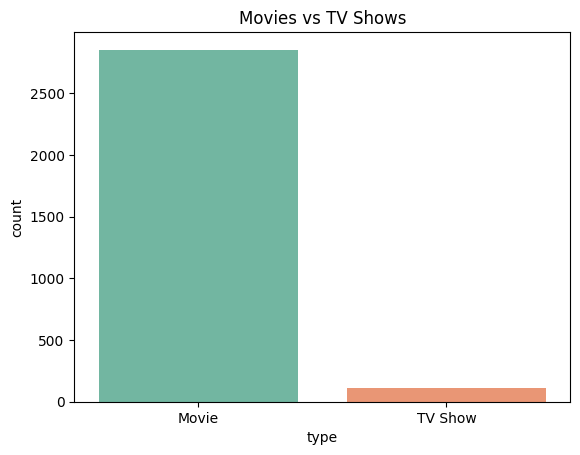

In [17]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Movies vs TV Shows')
plt.show()


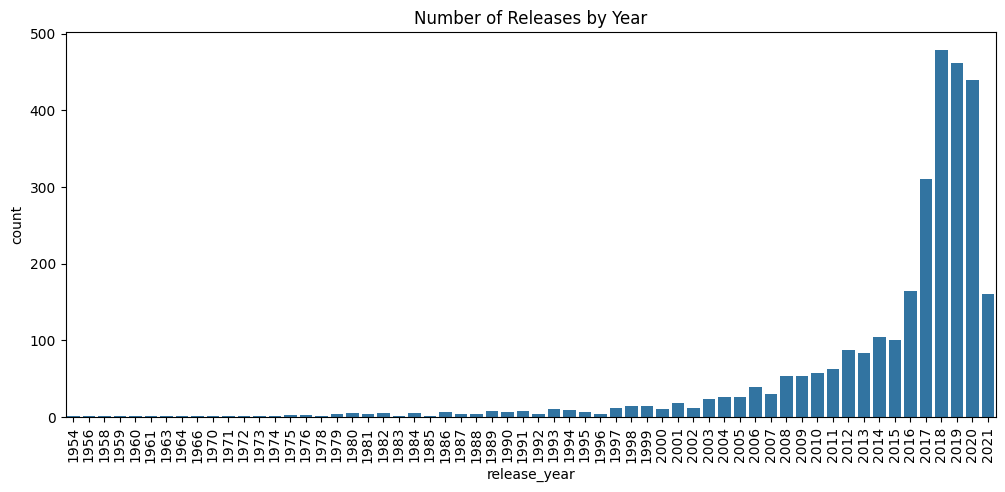

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].dropna().unique()))
plt.xticks(rotation=90)
plt.title('Number of Releases by Year')
plt.show()


/tmp/ipython-input-4201730507.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette='Set3')


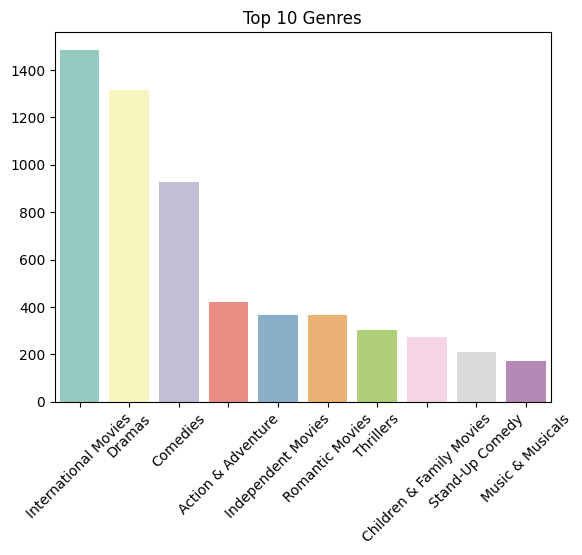

In [19]:
# Split genres and count
from collections import Counter
genres = df['listed_in'].str.split(', ').sum()
genre_counts = Counter(genres)
top_genres = dict(genre_counts.most_common(10))

sns.barplot(x=list(top_genres.keys()), y=list(top_genres.values()), palette='Set3')
plt.xticks(rotation=45)
plt.title('Top 10 Genres')
plt.show()


/tmp/ipython-input-2474754845.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')


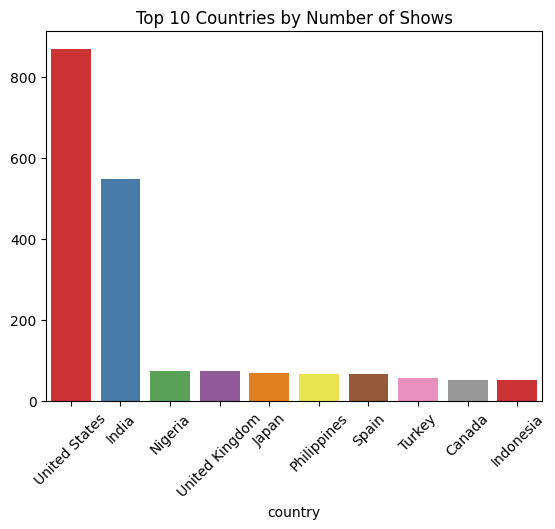

In [20]:
# Top content-producing countries
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Number of Shows')
plt.show()




In [21]:
# Interactive map
fig = px.choropleth(df.groupby('country').size().reset_index(name='count'),
                    locations='country', locationmode='country names',
                    color='count', title='Content Production by Country')
fig.show()

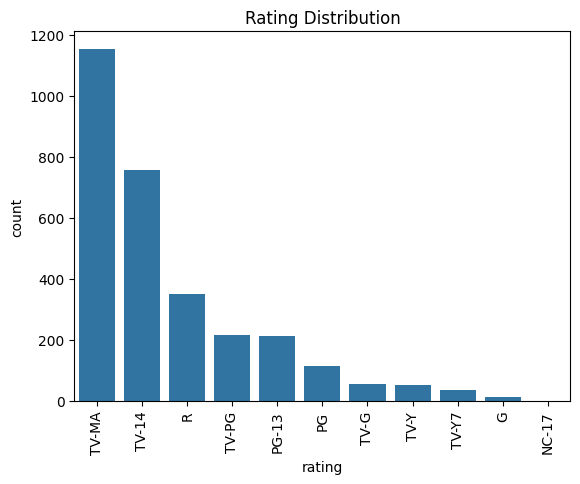

In [22]:
# Ratings distribution
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Rating Distribution')
plt.show()


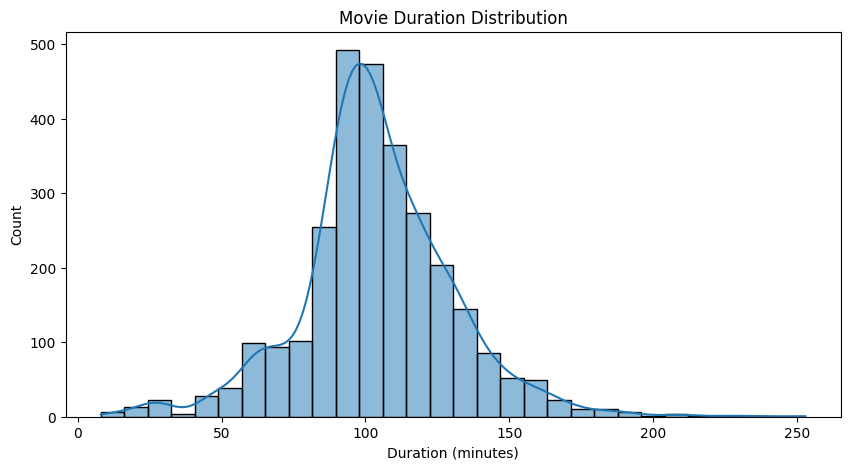

In [23]:
# Duration analysis
movies = df[df['type']=='Movie']
plt.figure(figsize=(10,5))
sns.histplot(movies['duration'].str.replace(' min','').astype(float), bins=30, kde=True)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()

/tmp/ipython-input-1925572793.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




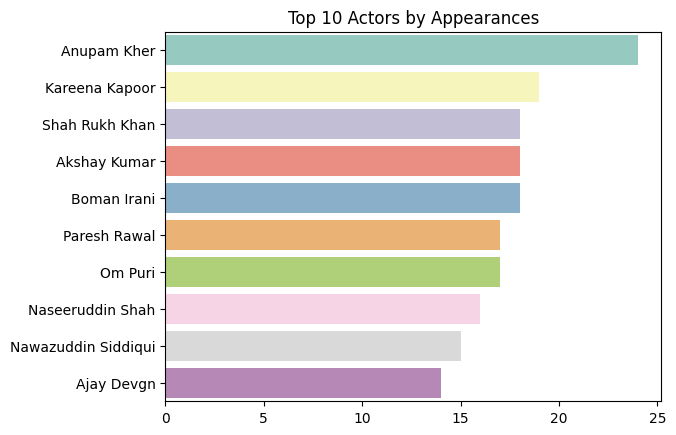

In [24]:
# Top actors (split cast column)
from itertools import chain
actors = list(chain.from_iterable(df['cast'].dropna().str.split(', ')))
actor_counts = Counter(actors).most_common(10)

sns.barplot(x=[x[1] for x in actor_counts], y=[x[0] for x in actor_counts], palette='Set3')
plt.title('Top 10 Actors by Appearances')
plt.show()

In [25]:
genre_trends = df.explode('listed_in'.split(', '))
trend = genre_trends.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
px.line(trend, x='release_year', y='count', color='listed_in', title='Genre Trends Over Years')


In [27]:
# Save to CSV in Colab
df.to_csv('netflix_cleaned.csv', index=False)

